# EXPLORATORY DATA ANALYSIS: TERRORISM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline
pd.set_option('display.max_columns', 135)

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', index_col = 'eventid')
df.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,

In [3]:
unwanted_col = ['approxdate', 'extended', 'resolution', 'country', 'region', 'provstate', 'latitude', 'longitude',
               'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'multiple', 'attacktype1', 'attacktype2', 'attacktype3',
               'targtype1', 'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3',
               'natlty3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt',
               'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype1', 'weaptype2', 'weaptype3', 'weaptype4', 'weapsubtype1', 
                'weapsubtype2', 'weapsubtype3', 'weapsubtype4', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'property', 'propextent',
               'propextent_txt', 'propcomment', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamtus', 'ransompaidus', 'hostkidoutcome_txt', 'nreleased',
                'addnotes',	'scite1', 'scite2',	'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',	'related', 'ransomnote']
df.drop(columns=unwanted_col, inplace=True)
print(df.columns)

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'specificity', 'vicinity', 'location', 'summary', 'alternative_txt',
       'success', 'suicide', 'attacktype1_txt', 'attacktype2_txt',
       'attacktype3_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'targtype2_txt', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2_txt', 'targtype3_txt', 'targsubtype3_txt', 'corp3',
       'target3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt',
       'weapsubtype2_txt', 'weaptype3_txt', 'weapsubtype3_txt',
       'weaptype4_txt', 'weapsubtype4_txt', 'nkill', 'nwound', 'propvalue',
       'ishostkid', 'nhostkid', 'nhostkidus', 'ransom', 'ransomamt',
       'ransompaid', 'hostkidoutcome'],
      dtype='object')


In [5]:
df.shape

(181691, 59)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 197000000001 to 201712310032
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   iday              181691 non-null  int64  
 3   country_txt       181691 non-null  object 
 4   region_txt        181691 non-null  object 
 5   city              181257 non-null  object 
 6   specificity       181685 non-null  float64
 7   vicinity          181691 non-null  int64  
 8   location          55495 non-null   object 
 9   summary           115562 non-null  object 
 10  alternative_txt   29011 non-null   object 
 11  success           181691 non-null  int64  
 12  suicide           181691 non-null  int64  
 13  attacktype1_txt   181691 non-null  object 
 14  attacktype2_txt   6314 non-null    object 
 15  attacktype3_txt   428 non-null     object 
 16  tar

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
iyear,181691.0,2.002639e+03,1.325943e+01,1970.0,1991.0,2009.0,2014.0000,2.017000e+03
imonth,181691.0,6.467277e+00,3.388303e+00,0.0,4.0,6.0,9.0000,1.200000e+01
iday,181691.0,1.550564e+01,8.814045e+00,0.0,8.0,15.0,23.0000,3.100000e+01
specificity,181685.0,1.451452e+00,9.954295e-01,1.0,1.0,1.0,1.0000,5.000000e+00
vicinity,181691.0,6.829727e-02,2.845529e-01,-9.0,0.0,0.0,0.0000,1.000000e+00
success,181691.0,8.895983e-01,3.133907e-01,0.0,1.0,1.0,1.0000,1.000000e+00
suicide,181691.0,3.650704e-02,1.875486e-01,0.0,0.0,0.0,0.0000,1.000000e+00
guncertain1,181311.0,8.144018e-02,2.735107e-01,0.0,0.0,0.0,0.0000,1.000000e+00
guncertain2,1955.0,2.654731e-01,4.416978e-01,0.0,0.0,0.0,1.0000,1.000000e+00
guncertain3,320.0,1.937500e-01,3.958543e-01,0.0,0.0,0.0,0.0000,1.000000e+00


In [9]:
df.describe(include = np.object).T

,count,unique,top,freq
country_txt,181691,205,Iraq,24636
region_txt,181691,12,Middle East & North Africa,50474
city,181257,36674,Unknown,9775
location,55495,44109,"The attack took place in Baghdad, Baghdad, Iraq.",142
summary,115562,112492,"09/00/2016: Sometime between September 18, 201...",100
alternative_txt,29011,5,Insurgency/Guerilla Action,23410
attacktype1_txt,181691,9,Bombing/Explosion,88255
attacktype2_txt,6314,9,Armed Assault,3434
attacktype3_txt,428,8,Facility/Infrastructure Attack,229
targtype1_txt,181691,22,Private Citizens & Property,43511


In [10]:
df.isna().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
region_txt               0
city                   434
specificity              6
vicinity                 0
location            126196
summary              66129
alternative_txt     152680
success                  0
suicide                  0
attacktype1_txt          0
attacktype2_txt     175377
attacktype3_txt     181263
targtype1_txt            0
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1_txt           1559
targtype2_txt       170547
targsubtype2_txt    171006
corp2               171574
target2             170671
natlty2_txt         170863
targtype3_txt       180515
targsubtype3_txt    180594
corp3               180665
target3             180516
natlty3_txt         180544
gname                    0
gsubname            175801
gname2              179678
gsubname2           181531
gname3              181367
gsubname3           181671
m

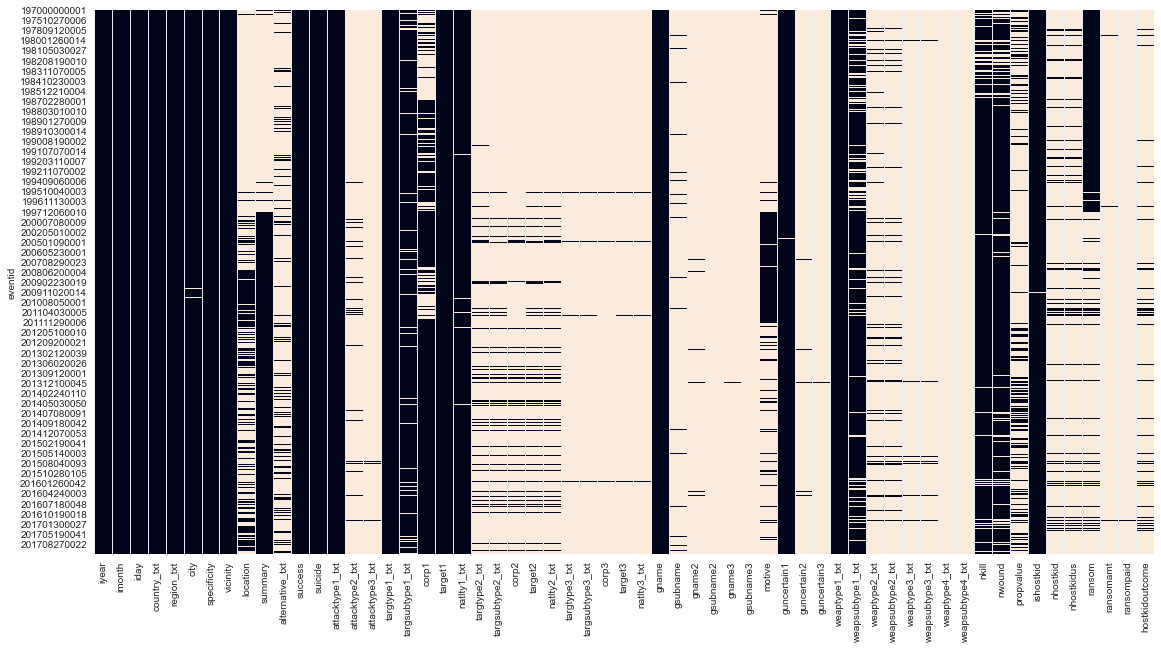

In [11]:
plt.figure(figsize=(19,10))
sns.heatmap(df.isna(), cbar= False);

In [12]:
# removing columns with over 10,000 missing values
re = [x for x in df.columns if df[x].isna().sum() > 100000]
df.drop(columns=re, inplace = True)

In [13]:
df.dropna(inplace = True)

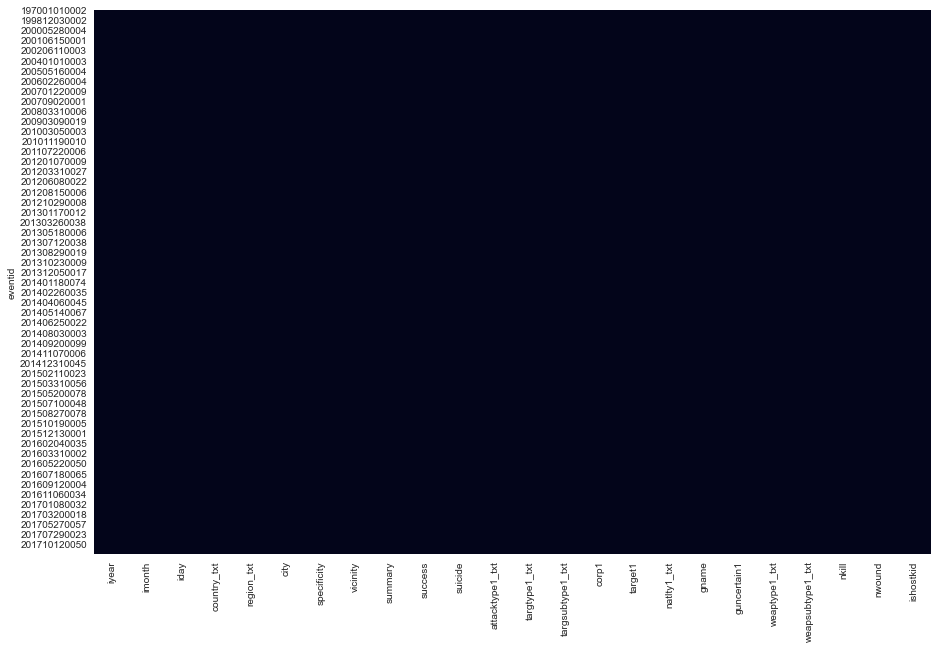

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.isna(), cbar=False);

In [15]:
df.isna().sum()

iyear               0
imonth              0
iday                0
country_txt         0
region_txt          0
city                0
specificity         0
vicinity            0
summary             0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
corp1               0
target1             0
natlty1_txt         0
gname               0
guncertain1         0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nwound              0
ishostkid           0
dtype: int64

In [16]:
df.drop(columns=['weapsubtype1_txt', 'summary', 'targsubtype1_txt'], inplace = True)

In [17]:
# Checking for columns with negative values and unknown string,
#which is indicating that those values are missing or nuknown or not inputted 
#either which way such values are not useful for our analysis
df = df[~((df['ishostkid'] == -9)|(df['vicinity'] == -9)|(df['target1'] == 'unknown'))]

In [18]:
num_coldf = df.select_dtypes(include=np.number)
cont_9999 = {x : num_coldf[x].between(-9999, -9, inclusive='both').sum() for x in num_coldf.columns}
print(cont_9999)

{'iyear': 0, 'imonth': 0, 'iday': 0, 'specificity': 0, 'vicinity': 0, 'success': 0, 'suicide': 0, 'guncertain1': 0, 'nkill': 0, 'nwound': 0, 'ishostkid': 0}


In [19]:
cat_df = df.select_dtypes(include=np.object)
cat_count = {x: len(cat_df[cat_df[x]=='unknown']) for x in cat_df.columns}
print(cat_count)

{'country_txt': 0, 'region_txt': 0, 'city': 0, 'attacktype1_txt': 0, 'targtype1_txt': 0, 'corp1': 0, 'target1': 0, 'natlty1_txt': 0, 'gname': 0, 'weaptype1_txt': 0}


In [20]:
df.shape

(83278, 21)

In [54]:
print(sorted([int(x) for x in day.unique()]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [52]:
sorted([int(x) for x in month.unique()])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [56]:
df[df.iday == 0].shape

(134, 21)

In [59]:
df = df[~(df.iday == 0)]

In [64]:
year = df.iyear.astype(np.str)
day = df.iday.astype(np.str)
month = df.imonth.astype(np.str)
df['date'] = day + '/' + month + '/' + year
#df['date'] = pd.to_datetime(date, dayfirst=True, format='%d/%m/%Y')

In [65]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,specificity,vicinity,success,suicide,...,corp1,target1,natlty1_txt,gname,guncertain1,weaptype1_txt,nkill,nwound,ishostkid,date
eventid,,,,,,,,,,,,,,,,,,,,,
197001010002,1970,1,1,United States,North America,Cairo,1.0,0,1,0,...,Cairo Police Department,Cairo Police Headquarters,United States,Black Nationalists,0.0,Firearms,0.0,0.0,0.0,1/1/1970
197001020002,1970,1,2,United States,North America,Oakland,1.0,0,1,0,...,Pacific Gas & Electric Company,Edes Substation,United States,Unknown,0.0,Explosives,0.0,0.0,0.0,2/1/1970
197001020003,1970,1,2,United States,North America,Madison,1.0,0,1,0,...,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,0.0,Incendiary,0.0,0.0,0.0,2/1/1970
197001030001,1970,1,3,United States,North America,Madison,1.0,0,1,0,...,Selective Service,Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,0.0,Incendiary,0.0,0.0,0.0,3/1/1970
197001060001,1970,1,6,United States,North America,Denver,1.0,0,1,0,...,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",United States,Left-Wing Militants,0.0,Incendiary,0.0,0.0,0.0,6/1/1970


In [66]:
with open('clean_df.pk', 'wb') as file:
    pk.dump(df, file)

In [2]:
df = pd.read_pickle('clean_df.pk')

In [3]:
df.shape

(83144, 22)

In [4]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,specificity,vicinity,success,suicide,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,weaptype1_txt,nkill,nwound,ishostkid,date
eventid,,,,,,,,,,,,,,,,,,,,,,
197001010002,1970,1,1,United States,North America,Cairo,1.0,0,1,0,Armed Assault,Police,Cairo Police Department,Cairo Police Headquarters,United States,Black Nationalists,0.0,Firearms,0.0,0.0,0.0,1/1/1970
197001020002,1970,1,2,United States,North America,Oakland,1.0,0,1,0,Bombing/Explosion,Utilities,Pacific Gas & Electric Company,Edes Substation,United States,Unknown,0.0,Explosives,0.0,0.0,0.0,2/1/1970
197001020003,1970,1,2,United States,North America,Madison,1.0,0,1,0,Facility/Infrastructure Attack,Military,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",United States,New Year's Gang,0.0,Incendiary,0.0,0.0,0.0,2/1/1970
197001030001,1970,1,3,United States,North America,Madison,1.0,0,1,0,Facility/Infrastructure Attack,Government (General),Selective Service,Selective Service Headquarters in Madison Wisc...,United States,New Year's Gang,0.0,Incendiary,0.0,0.0,0.0,3/1/1970
197001060001,1970,1,6,United States,North America,Denver,1.0,0,1,0,Facility/Infrastructure Attack,Military,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",United States,Left-Wing Militants,0.0,Incendiary,0.0,0.0,0.0,6/1/1970


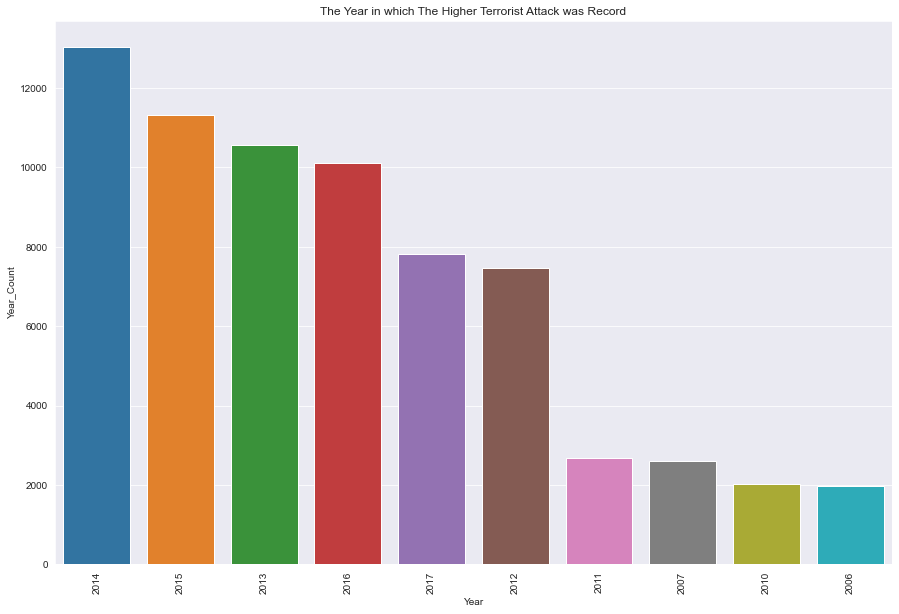

In [5]:
date_of_terrorist_attack = df['iyear'].value_counts().to_frame().sort_values(by = 'iyear', ascending = False).reset_index()
#print(date_of_terrorist_attack[''])
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(data=date_of_terrorist_attack.iloc[:10, :].astype({'index':np.str}), x = 'index', y = 'iyear', ax = ax, )
ax.set_xlabel('Year')
ax.set_ylabel('Year_Count')
ax.set_title('The Year in which The Higher Terrorist Attack was Record');
ax.tick_params(axis='x', rotation=90);

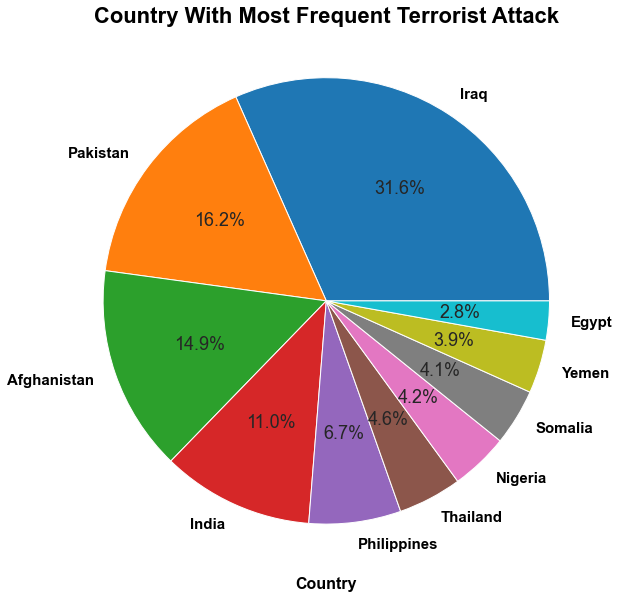

In [6]:
# Country with most frequent terrorist attack
country = df.country_txt.value_counts().sort_values(ascending = False).to_frame().reset_index()
country.head()
with plt.rc_context({'axes.titlecolor':'black', 'axes.labelweight':'bold', 'axes.labelsize':16, 'axes.titleweight':'bold', 'axes.titlesize':22, 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(figsize = (10,10))
    ax.axis('equal')
    patches, texts, autotexts = ax.pie(data=country.iloc[:10, :], labels = 'index', x= 'country_txt', autopct = '%1.1f%%')
    ax.set_xlabel('Country', color = 'black')
    ax.set_title('Country with most frequent terrorist attack'.title());
    for text in texts:
        text.set_color('black')
        text.set_fontsize(15)
        text.set_fontweight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(18)


In [7]:
success_rt = df[['country_txt', 'success']]
success_rt['success_txt'] = success_rt.success.map({1:'successful', 0:'failed'})
success_rt = success_rt.pivot_table(values = 'success', index = 'country_txt', columns = ['success_txt'], aggfunc='count')
#success_rt['total'] = success_rt['failed'] + success_rt['successful']
success_rt['failed'], success_rt['successful'] = success_rt['failed']/success_rt['failed'].sum(), success_rt['successful']/success_rt['successful'].sum()
success_rt.fillna(value=0, inplace = True)
success_rt.reset_index(inplace=True)
success_rt.sort_values(by = 'successful', ascending = False).head()

success_txt,country_txt,failed,successful
69,Iraq,0.141213,0.230676
111,Pakistan,0.118311,0.112659
0,Afghanistan,0.084129,0.106561
65,India,0.105651,0.073642
117,Philippines,0.064564,0.044497


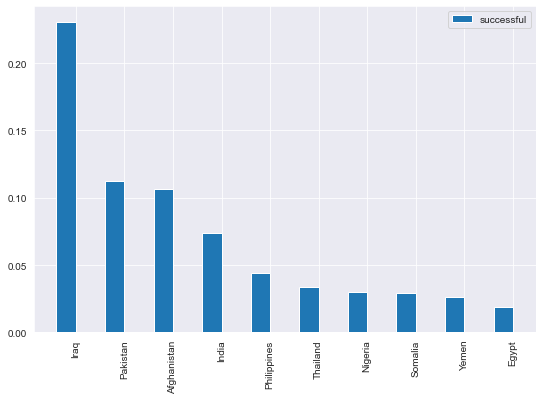

In [8]:
fig, ax = plt.subplots(figsize = (9,6))
data = success_rt.sort_values(by = 'successful', ascending = False)[:10]
fir = ax.bar(np.arange(len(data.index))-0.4/2, data.successful.to_list(), 0.4, label = 'successful')
#sec = ax.bar(np.arange(len(data.index))+0.4/2, data.failed.to_list(), 0.4, label = 'failed')
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(data.country_txt, rotation = 90)
ax.legend();

In [9]:
success_rt.sort_values(by = 'failed', ascending = False)[success_rt['failed'] > 0]

success_txt,country_txt,failed,successful
69,Iraq,0.141213,0.230676
111,Pakistan,0.118311,0.112659
65,India,0.105651,0.073642
0,Afghanistan,0.084129,0.106561
117,Philippines,0.064564,0.044497
...,...,...,...
33,Croatia,0.000115,0.000094
115,People's Republic of the Congo,0.000115,0.000000
96,Mauritania,0.000115,0.000107
90,Madagascar,0.000115,0.000161


In [10]:
x = df.weaptype1_txt.value_counts().to_frame()
x['weaptype1_txt'] = np.round((x['weaptype1_txt']/len(df))*100, 2)
x.columns = ['weap_count%']
x

,weap_count%
Explosives,59.89
Firearms,32.47
Incendiary,5.48
Melee,2.04
Chemical,0.13


In [11]:
x = df.targtype1_txt.value_counts().to_frame()
x['targtype1_txt'] = np.round((x['targtype1_txt']/len(df))*100, 2)
x.columns = ['targ_count%']
x

,targ_count%
Private Citizens & Property,25.00
Military,17.73
Police,17.66
Government (General),12.85
Business,8.03
Religious Figures/Institutions,3.03
Transportation,2.83
Educational Institution,2.72
Utilities,2.21
Terrorists/Non-State Militia,2.21


In [12]:
success_rt = df[['country_txt', 'ishostkid']]
success_rt['ishostkid_txt'] = success_rt.ishostkid.map({1:'hostage', 0:'not_hostage'})
success_rt = success_rt.pivot_table(values = 'ishostkid', index = 'country_txt', columns = ['ishostkid_txt'], aggfunc='count')
#success_rt['total'] = success_rt['failed'] + success_rt['successful']
success_rt['not_hostage'], success_rt['hostage'] = success_rt['not_hostage']/success_rt['not_hostage'].sum(), success_rt['hostage']/success_rt['hostage'].sum()
success_rt.fillna(value=0, inplace = True)
success_rt.sort_values(by = 'hostage', ascending = False).head()

ishostkid_txt,hostage,not_hostage
country_txt,,
India,0.159074,0.072915
Afghanistan,0.121150,0.103377
Iraq,0.092135,0.227735
Pakistan,0.079919,0.114902
Philippines,0.077119,0.045080
